In [635]:
# =========================================
# Data Handling & Analysis
# =========================================
import numpy as np
import pandas as pd

# =========================================
# Visualization
# =========================================
import matplotlib.pyplot as plt
import seaborn as sns

# =========================================
# Machine Learning - Scikit-Learn
# =========================================
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Common regressors
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



In [636]:
file_path = "../data/data_1.csv" #rows 1-53
dmfs = pd.read_csv(file_path)
dmfs.columns = dmfs.columns.str.strip()
dmfs = dmfs.sample(frac=1,random_state=1)
dmfs.head(12)

,Difference in Days,Dates in DARRTS/Panorama,Date of Deficiency letter issued,Date of CR response,Consult Yes/No,MAD1:Inadequate selection or justification of starting materials,MAD2: An unqualified impurity (toxicology studies required to qualify the impurity):,MAD3: Reference to a secondary DMF,MAD 4:Failure to provide adequate analytical methods,MAD5: Insufficient physical or chemical characterization data,MAD6: Major change in drug substance manufacturing process,MAD 7: Requirement to manufacture a new API batch,Total number of Major deficiencies,Total Number of deficiencies
10,49.0,11/1/2022,"44,866.00","44,915.00",no,0,1,0,0,0,0,0,1,3
70,227.0,8/4/2023,"45,145.00","45,372.00",No,0,1,0,0,0,0,0,1,0
47,168.0,5/10/2023,"45,057.00","45,225.00",Yes,0,1,0,0,0,0,0,1,0
54,160.0,6/1/2023,"45,079.00","45,239.00",No,0,1,0,0,0,0,0,1,0
40,89.0,5/2/2023,"45,049.00","45,138.00",yes,0,1,0,0,0,0,0,1,6
65,104.0,7/14/2023,"45,125.00","45,229.00",No,0,1,0,0,0,0,0,1,0
59,152.0,6/12/2023,"45,093.00","45,245.00",No,0,1,0,0,0,0,0,1,0
81,282.0,9/25/2023,"45,194.00","45,476.00",No,0,1,0,0,0,0,0,1,0
77,209.0,8/25/2023,"45,167.00","45,376.00",No,0,1,0,0,0,0,0,1,0
45,23.0,5/10/2023,"45,056.00","45,079.00",No,0,1,0,0,0,0,0,1,0


In [637]:
response_times = dmfs['Difference in Days']


In [638]:
features = ['Consult Yes/No',
            'MAD1:Inadequate selection or justification of starting materials',
            'MAD2: An unqualified impurity (toxicology studies required to qualify the impurity):',
            'MAD3: Reference to a secondary DMF',
            'MAD 4:Failure to provide adequate analytical methods',
            'MAD5: Insufficient physical or chemical characterization data',
            'MAD6: Major change in drug substance manufacturing process',
            'MAD 7: Requirement to manufacture a new API batch',
            'Total number of Major deficiencies', 
            'Total Number of deficiencies']
data = dmfs.loc[:,features]

def yes_to_int(x):
    if(x.lower() == 'yes'):
        return 1
    else:
        return 0
    
data['Consult Yes/No'] = data['Consult Yes/No'].apply(lambda x : yes_to_int(x) )
data



,Consult Yes/No,MAD1:Inadequate selection or justification of starting materials,MAD2: An unqualified impurity (toxicology studies required to qualify the impurity):,MAD3: Reference to a secondary DMF,MAD 4:Failure to provide adequate analytical methods,MAD5: Insufficient physical or chemical characterization data,MAD6: Major change in drug substance manufacturing process,MAD 7: Requirement to manufacture a new API batch,Total number of Major deficiencies,Total Number of deficiencies
10,0,0,1,0,0,0,0,0,1,3
70,0,0,1,0,0,0,0,0,1,0
47,1,0,1,0,0,0,0,0,1,0
54,0,0,1,0,0,0,0,0,1,0
40,1,0,1,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...
75,1,0,1,0,0,0,0,0,1,0
9,0,0,1,0,0,0,0,0,1,1
72,1,0,0,1,0,0,0,0,1,0
12,1,0,1,0,0,0,0,0,1,1


In [639]:
data

,Consult Yes/No,MAD1:Inadequate selection or justification of starting materials,MAD2: An unqualified impurity (toxicology studies required to qualify the impurity):,MAD3: Reference to a secondary DMF,MAD 4:Failure to provide adequate analytical methods,MAD5: Insufficient physical or chemical characterization data,MAD6: Major change in drug substance manufacturing process,MAD 7: Requirement to manufacture a new API batch,Total number of Major deficiencies,Total Number of deficiencies
10,0,0,1,0,0,0,0,0,1,3
70,0,0,1,0,0,0,0,0,1,0
47,1,0,1,0,0,0,0,0,1,0
54,0,0,1,0,0,0,0,0,1,0
40,1,0,1,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...
75,1,0,1,0,0,0,0,0,1,0
9,0,0,1,0,0,0,0,0,1,1
72,1,0,0,1,0,0,0,0,1,0
12,1,0,1,0,0,0,0,0,1,1


In [640]:
data.columns = ['Consult',
                'MAD1',
                'MAD2',
                'MAD3',
                'MAD4',
                'MAD5',
                'MAD6',
                'MAD7',
                'Total Major Deficiencies',
                'Total Deficiencies',
                ]
X = data.loc[:,['Consult','Total Major Deficiencies','Total Deficiencies']]
y = response_times
booleans     = ['Consult',
                'MAD1',
                'MAD2',
                'MAD3',
                'MAD4',
                'MAD5',
                'MAD6',
                'MAD7',]
# for col in X[booleans]:
#     if set(X[col].unique()).issubset({0, 1}):  # only for binary columns
#         # Create two groups based on 0/1
#         group0 = y[X[col] == 0]
#         group1 = y[X[col] == 1]

#         # Boxplot
#         plt.boxplot([group0, group1], labels=['0', '1'])
#         plt.title(f'Response Time vs {col}')
#         plt.ylabel('Response Time')
#         plt.show()

In [641]:
data

,Consult,MAD1,MAD2,MAD3,MAD4,MAD5,MAD6,MAD7,Total Major Deficiencies,Total Deficiencies
10,0,0,1,0,0,0,0,0,1,3
70,0,0,1,0,0,0,0,0,1,0
47,1,0,1,0,0,0,0,0,1,0
54,0,0,1,0,0,0,0,0,1,0
40,1,0,1,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...
75,1,0,1,0,0,0,0,0,1,0
9,0,0,1,0,0,0,0,0,1,1
72,1,0,0,1,0,0,0,0,1,0
12,1,0,1,0,0,0,0,0,1,1


In [642]:
X

,Consult,Total Major Deficiencies,Total Deficiencies
10,0,1,3
70,0,1,0
47,1,1,0
54,0,1,0
40,1,1,6
...,...,...,...
75,1,1,0
9,0,1,1
72,1,1,0
12,1,1,1


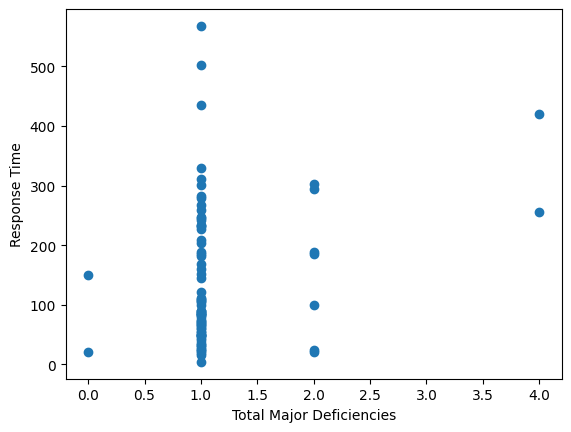

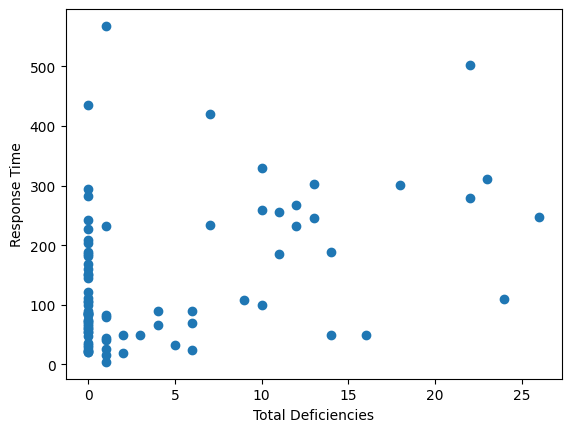

In [643]:
numericals = ['Total Major Deficiencies',
                'Total Deficiencies']
for col in numericals:
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel('Response Time')
    plt.show()

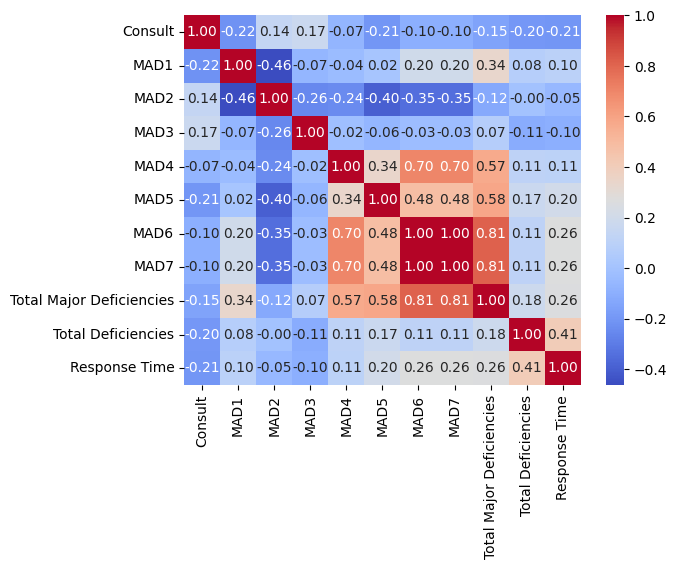

In [644]:
heatmap_variables = data.copy()   
heatmap_variables['Response Time'] = response_times
sns.heatmap(heatmap_variables.corr(), annot=True, fmt=".2f",cmap='coolwarm')
plt.show()


In [645]:
Major_Deficiency_Model = DecisionTreeRegressor(random_state=1)

train_X, valid_X, test_X = np.split(X,[int(len(X)*.6),int(len(X)*.8)])
train_y, valid_y, test_y = np.split(y,[int(len(y)*.6),int(len(y)*.8)])

Major_Deficiency_Model.fit(train_X,train_y)

pred_y = pd.DataFrame(Major_Deficiency_Model.predict(valid_X),columns=['predictions'])



c:\Users\andre\CODING PROJECTS\Personal\major-deficiencies\.venv\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
c:\Users\andre\CODING PROJECTS\Personal\major-deficiencies\.venv\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [646]:
X

,Consult,Total Major Deficiencies,Total Deficiencies
10,0,1,3
70,0,1,0
47,1,1,0
54,0,1,0
40,1,1,6
...,...,...,...
75,1,1,0
9,0,1,1
72,1,1,0
12,1,1,1


In [647]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score
)
from sklearn.model_selection import GridSearchCV

In [648]:
param_grid = {
    "max_depth": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3],
    "min_samples_split": [2, 3, 4],
    "max_leaf_nodes" : [5,10,20,40,50,60]
}
grid_search = GridSearchCV(
    estimator=Major_Deficiency_Model,       # model to tune
    param_grid=param_grid, # hyperparameters to try
    scoring="neg_mean_squared_error",  # metric to optimize
    cv=5,                  # 5-fold cross-validation
    n_jobs=-1              # use all CPU cores
)
grid_search.fit(train_X, train_y)


,estimator,DecisionTreeR...andom_state=1)
,param_grid,"{'max_depth': [2, 3, ...], 'max_leaf_nodes': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 3, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [649]:
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(valid_X)
print(mean_absolute_error(valid_y,y_val_pred))

89.80840773809524


In [650]:
X_full_train = pd.concat([train_X, valid_X], ignore_index=True)
y_full_train = pd.concat([train_y, valid_y], ignore_index=True)
best_model.fit(X_full_train,y_full_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,5
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [651]:
y_test_pred = best_model.predict(test_X)
print(mean_absolute_error(test_y,y_test_pred))

90.21764705882353


[0. 0. 1.]


<function matplotlib.pyplot.show(close=None, block=None)>

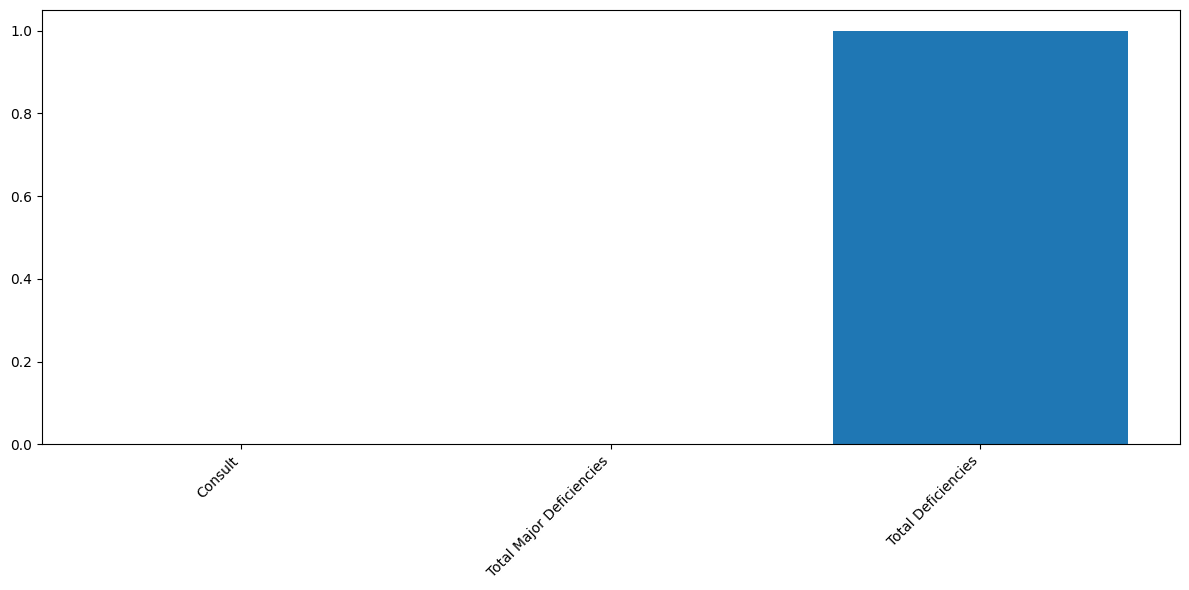

In [652]:
print(best_model.feature_importances_)
plt.figure(figsize=(12, 6)) 
plt.bar(X_full_train.columns,best_model.feature_importances_)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

In [653]:
rf = RandomForestRegressor(random_state=1)
rf.fit(train_X,train_y)
rf_preds = rf.predict(valid_X)
rf_val_mae = mean_absolute_error(rf_preds, valid_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 89.5195170179613
